In [35]:

import pandas as pd

# 指定Excel文件路径和sheet名称
file_path = r"C:\Users\Lanto\Downloads\Experiment_data.xlsx"
sheet_name1 = "Print1"
sheet_name2 = "half-lens RAW"
sheet_name3 = "quater-lens RAW"

# 使用pandas读取Excel文件中的数据
df = pd.read_excel(file_path, sheet_name=sheet_name3)

[0.00479214 1.125025   0.07836986 1.44139119 2.22770893]


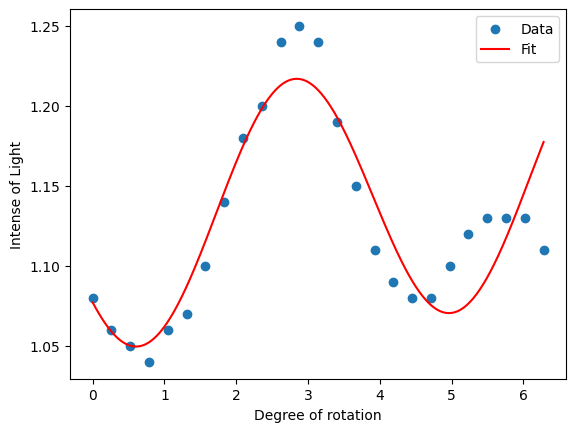

In [38]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
# 定义你的函数
def func(x, a, b, c, d, e):
    return a*x + b +c*np.cos(d*x+e)
# 提取特征和目标变量
X = df.iloc[:, 12].values
y = df.iloc[:, 13].values
X=X/360*2*np.pi
# 使用curve_fit进行拟合

popt, pcov = curve_fit(func, X, y,p0=[0,1.25,1.25,2,0])

# 打印拟合参数
print(popt)

# 生成x值
x_values = np.linspace(0, 2*np.pi, 400)

# 使用拟合的参数计算y值
y_values = func(x_values, *popt)

# 画出原始数据点
plt.scatter(X, y, label='Data')

# 画出拟合的曲线
plt.plot(x_values, y_values, color='red', label='Fit')
plt.xlabel('Degree of rotation')
plt.ylabel('Intense of Light')
plt.legend()
plt.show()